In [3]:
import matplotlib.pyplot as plt

plt.rcParams["figure.constrained_layout.use"] = True
plt.rcParams["scatter.edgecolors"] = "black"
plt.rcParams["lines.linewidth"] = 0.25

import seaborn as sns

sns.set()
sns.set_context("notebook")
sns.set_palette("PuBu")

import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons, load_digits
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA


# Weakness of k-Means


In [4]:
X, y = make_blobs(n_samples=400, centers=4, cluster_std=0.6, random_state=2)
X = X[:, ::-1]
kmeans = KMeans(4, random_state=2)
labels = kmeans.fit_predict(X)

/Users/vajk/opt/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


''

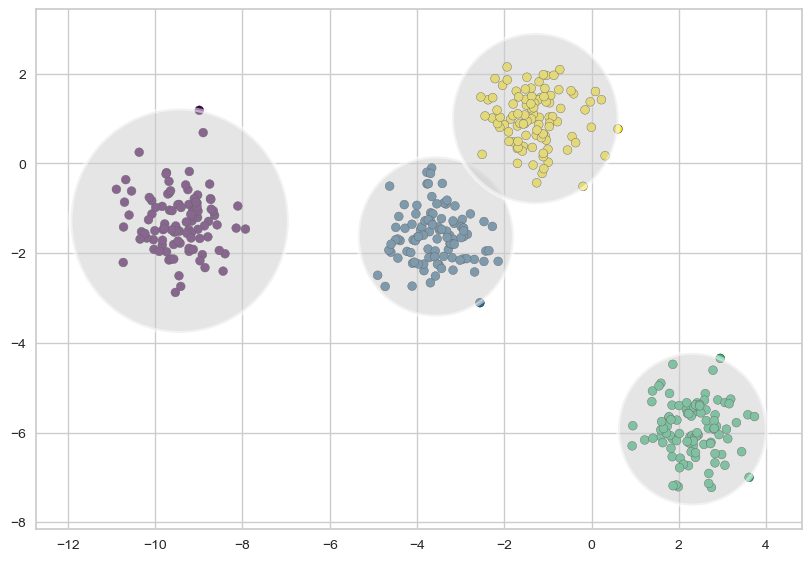

In [22]:
from scipy.spatial.distance import cdist

fig, ax=plt.subplots()
ax.scatter(X[:,0],X[:,1], c=labels, s=40, cmap='viridis')

inertia=kmeans.inertia_
radius = np.sqrt(inertia / (2 * len(X)))
diameter = 2 * radius
centers=kmeans.cluster_centers_ 
radii = [cdist(X[labels == i], [center]).max()
    for i, center in enumerate(centers)]
for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
# for center in centers:
#     circle=plt.Circle(center, diameter, alpha=.2)
#     ax.add_patch(circle)

;

/Users/vajk/opt/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


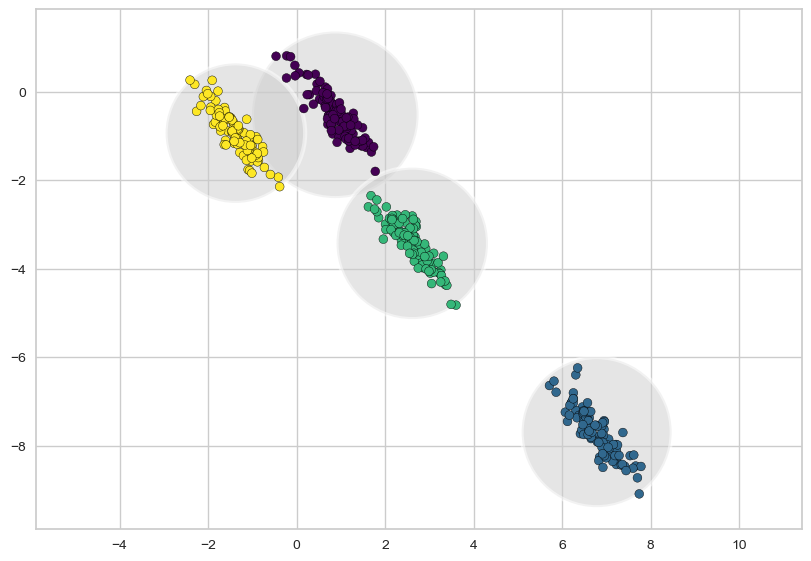

In [23]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis("equal")
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap="viridis", zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc="#CCCCCC", lw=3, alpha=0.5, zorder=1))


rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

# Gaussian Mixture Models


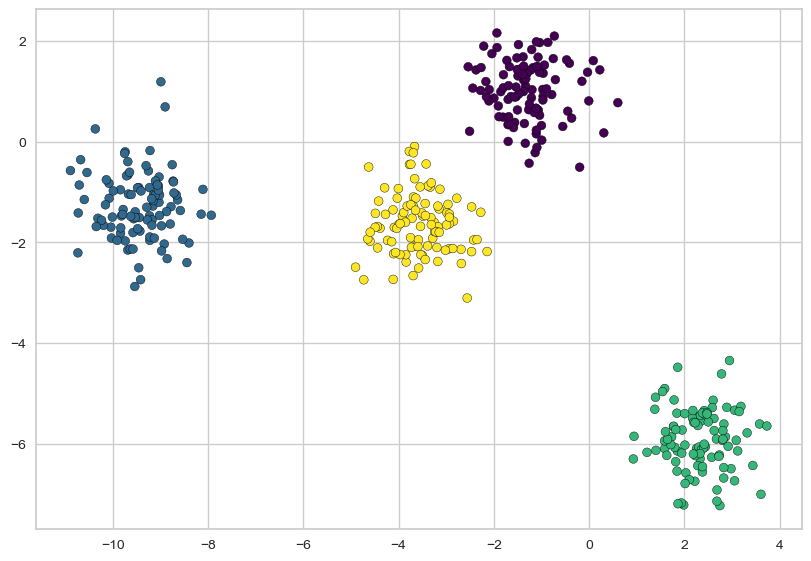

In [25]:
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap="viridis")

In [30]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


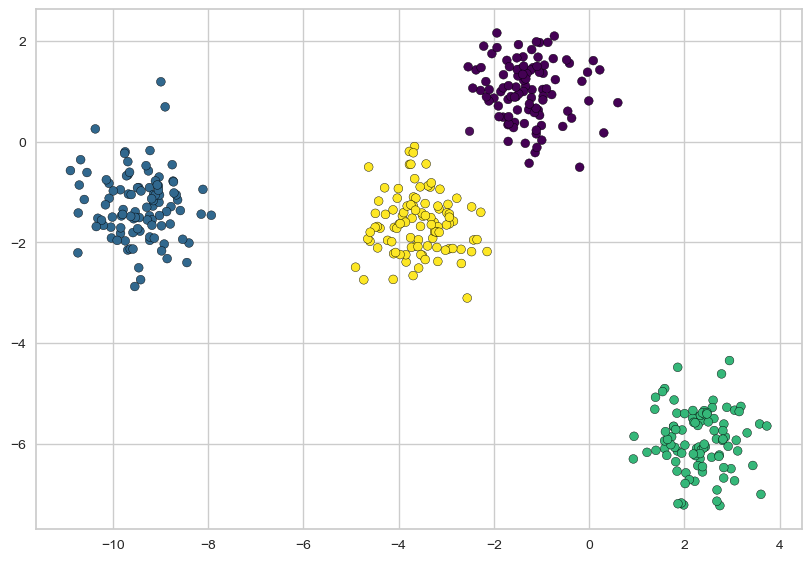

In [37]:
alphas = probs.max(1) ** 2
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40 * alphas, alpha=alphas, cmap="viridis")

/var/folders/37/qm04wzz922lbp9wmkw415w100000gn/T/ipykernel_37231/3570131855.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


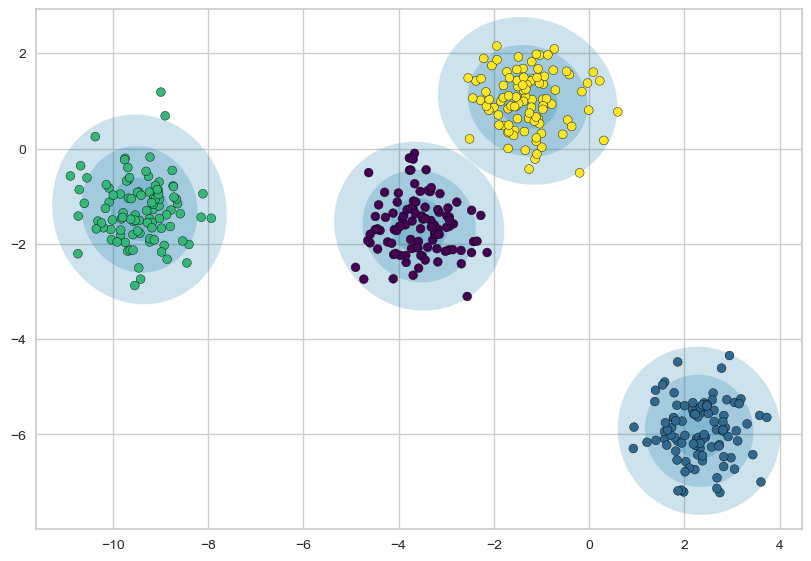

In [41]:
from matplotlib.patches import Ellipse


def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))


def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap="viridis", zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis("equal")

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

/var/folders/37/qm04wzz922lbp9wmkw415w100000gn/T/ipykernel_37231/3570131855.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


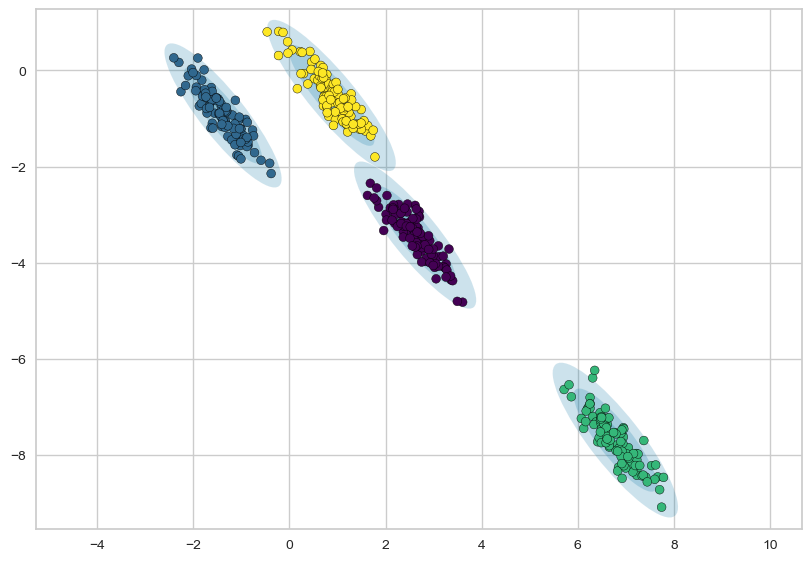

In [43]:
gmm = GaussianMixture(n_components=4, covariance_type="full", random_state=42)
plot_gmm(gmm, X_stretched)

# GMM as Densitiy Estimation


/var/folders/37/qm04wzz922lbp9wmkw415w100000gn/T/ipykernel_37231/3570131855.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


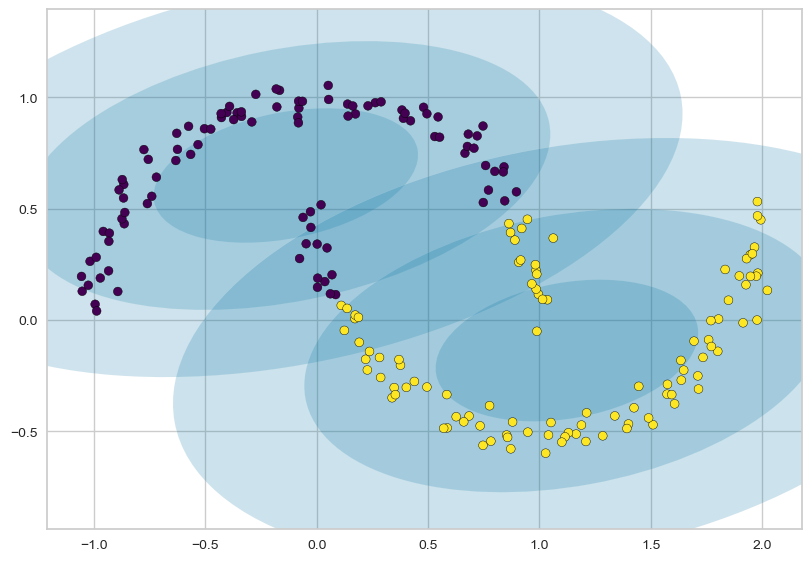

In [44]:
X, y = make_moons(200, noise=0.05, random_state=3)
gmm = GaussianMixture(n_components=2, covariance_type="full", random_state=42)
plot_gmm(gmm, X)


/var/folders/37/qm04wzz922lbp9wmkw415w100000gn/T/ipykernel_37231/3570131855.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


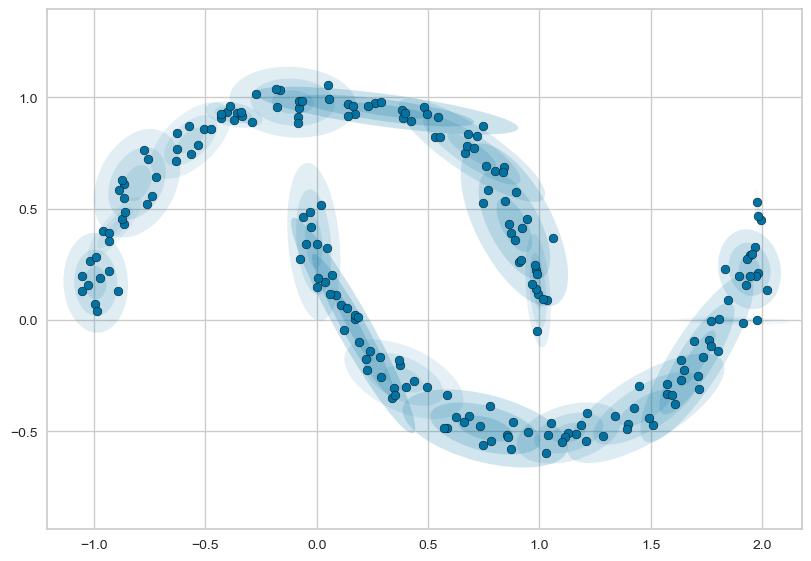

In [46]:
gmm = GaussianMixture(n_components=20, covariance_type="full", random_state=42)
plot_gmm(gmm, X, label=False)


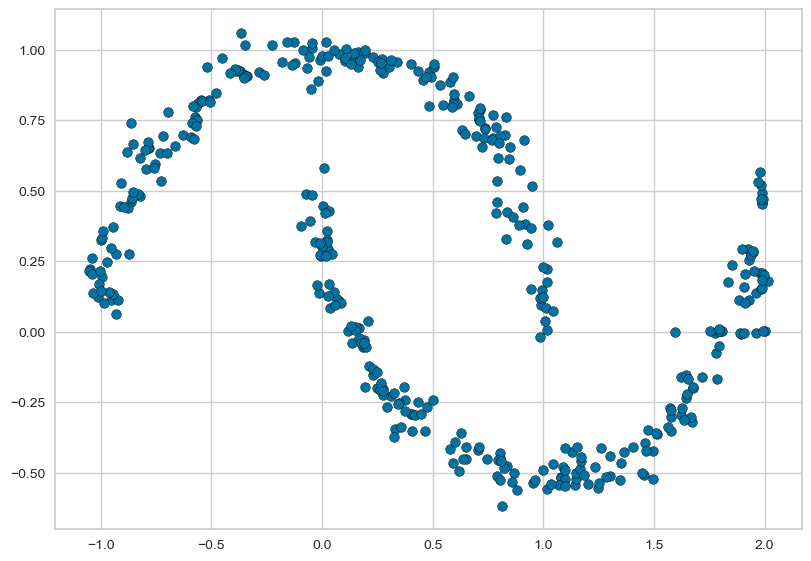

In [51]:
X_new = gmm.sample(400)
plt.scatter(X_new[0][:, 0], X_new[0][:, 1])


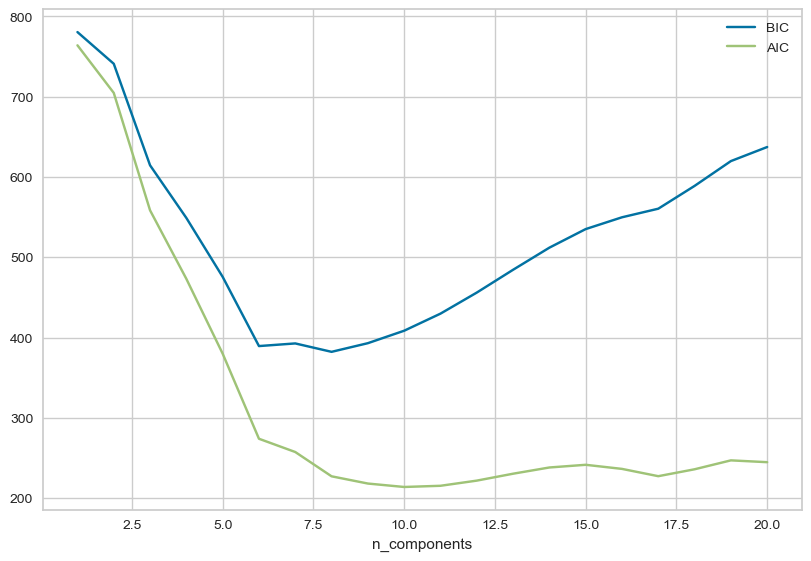

In [54]:
n_components = np.arange(1, 21)
models = [
    GaussianMixture(n, covariance_type="full", random_state=0).fit(X)
    for n in n_components
]

plt.plot(n_components, [m.bic(X) for m in models], label="BIC")
plt.plot(n_components, [m.aic(X) for m in models], label="AIC")
plt.legend(loc="best")
plt.xlabel("n_components")

The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use. The AIC tells us that our choice of 16 components above was probably too many: around 8-12 components would have been a better choice.
As is typical with this sort of problem, the BIC recommends a simpler model.

Notice the important point: this choice of number of components measures how well GMM works _as a density estimator_, not how well it works _as a clustering algorithm_.
I'd encourage you to think of GMM primarily as a density estimator, and use it for clustering only when warranted within simple datasets.
